<a href="https://colab.research.google.com/github/KodaiS/ML-study/blob/main/EigenFaces.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Eigenfaces

## Abstract
元文献は[こちら](https://doi.org/10.1162/jocn.1991.3.1.71)。
著者らは、被験者の頭の位置を特定し追跡し、顔の特徴を既知の個人と比較することによってその人物を認識する、ほぼリアルタイムのコンピュータ・システムを開発した。このシステムで採られている計算アプローチは、生理学と情報理論の両方から動機づけられており、また、ほぼリアルタイムの性能と精度という実用的な要件からも動機づけられている。筆者らのアプローチは、顔認識問題を3次元形状の復元を必要とするのではなく、本質的に2次元（2-D）認識問題として扱い、顔は通常直立しており、したがって2次元の特徴的なビューの小さな集合によって記述され得るという事実を利用する。このシステムは、既知の顔画像間の有意な差異にまたがる特徴空間に顔画像を投影することによって機能する。重要な特徴は、顔の集合の固有ベクトル（主成分）であるため、「固有顔」として知られている。投影操作は、固有顔の特徴の重み付き合計によって個々の顔を特徴付けるので、特定の顔を認識するには、これらの重みを既知の個人のものと比較するだけでよい。本アプローチの特に優れた点は、教師なしで新しい顔を学習し認識する能力を提供すること、およびニューラルネットワークアーキテクチャを使用して簡単に実装できることである。

## Calculating Eigenfaces
顔画像 $I(x,y)$ を（8ビットの）強度値の2次元 $N \times N$ 配列とする。画像は $N^2$ 次元のベクトルとして考えることもできるので、256 * 256 サイズの典型的な画像は65,536次元のベクトルになる。画像の集合は、この巨大な空間における点の集まりに対応する。
顔の画像は全体的な構成が似ているため、この巨大な画像空間にランダムに分布するのではなく、比較的低次元の部分空間によって記述することができる。主成分分析（またはKarhunen-Loeve展開）の主な発想は、画像空間全体の中で顔画像の分布を最もよく説明するベクトルを見つけることである。これらのベクトルは顔画像の部分空間を定義し、筆者らはこれを "顔空間" と呼ぶ。これら長さ $N^2$ のベクトルは、$N \times N$ の画像を記述するものであり、元の顔画像の線形結合である。これらのベクトルは、元の顔画像の共分散行列の固有ベクトルであり、外観が顔に似ているため、"固有顔" と呼ぶ。次に固有顔の計算方法を説明する。

顔画像のトレーニング集合を $ \Gamma_1, \Gamma_2, \Gamma_3, \dots, \Gamma_M$ とする。集合の平均顔は $ \Psi = \frac{1}{M} \sum_{n=1}^M \Gamma_n $ で定義される。各顔は、$ \Phi_i = \Gamma_i - \Psi $ のように、平均0に中心化する。中心化されたベクトル集合は主成分分析にかけられ、データの分布を最もよく記述する $M$ 個（データの次元数よりも画像枚数 $M$ が少ないケース）の正規直交ベクトル $ \textbf{u}_n$ の集合を求める。主成分分析では、$k$ 番目のベクトル $\textbf{u}_k$ は次の $\lambda_k$ が最大になるように選ばれる。

$$
λ_k = \frac{1}{M} \sum_{n=1}^{M} \left( \textbf{u}_k^T \Phi_n \right)^2
$$

$\textbf{u}_n$ は正規直交ベクトルの集合であるから、条件は以下の通り。

$$
\textbf{u}_l^T \textbf{u}_k = \delta_{lk}
= \begin{cases}
1 & \text{if} \quad l = k\\
0 & \text{otherwise}
\end{cases}
$$

このベクトル $\textbf{u}_k$ とスカラー $\lambda_k$ は次の分散共分散行列 $C$ の固有ベクトルと固有値を求めることで得られる。

$$
C = \frac{1}{M} \sum_{n=1}^{M} \Phi_n \Phi_n^T = AA^T
$$

行列 $A$ は $A = \left[ \Phi_1 \, \Phi_2 \dots \Phi_M \right]$ である。


ここで、行列 $C$ は $N^2 \times N^2$ であり、$N^2$ 個の固有ベクトルと固有値を決定するのは一般的な画像サイズでは実行不可能なタスクである。そのためこれらの固有ベクトルを求める実行可能な方法を考える必要がある。

画像空間のデータ点数が空間の次元よりも少ない場合（$M \lt N^2$）、意味のある固有ベクトルは $N^2$ ではなく $M - 1$ しか存在しない(残りの固有ベクトルは、関連する固有値がゼロ)。 この場合、まず $M \times M$ 行列の固有ベクトルを求めることで、$N^2$ 次元の固有ベクトルを得ることができる。具体的には次のような手順を取る。

まず $A^T A$ ($M \times M$ 行列) の固有ベクトル $\textbf{v}_i$ を考える。

$$
A^T A \textbf{v}_i = \mu_i \textbf{v}_i
$$

固有値 $\mu_i$ はスカラーである。両辺に左から $A$ を掛けると

$$
AA^T A \textbf{v}_i = \mu_i A \textbf{v}_i
$$

となり、$A \textbf{v}_i$ が $C = AA^T$ の固有ベクトルであることがわかる。

この分析に従い、成分が $L_{mn} = \Phi_m^T \Phi_n$ である $M \times M$ 行列 $L = A^TA$  構成し、$M$ 個の $L$ の固有ベクト
ル $\textbf{v}_l \, (l = 1, \dots, M)$ を見つける。これらの固有ベクトルはM個の学習用顔画像の線形結合を決定し、固有顔である正規直交ベクトル $\textbf{u}_l$ を構成する。

$$
\textbf{u}_l = A \textbf{v}_l \
= \left[ \Phi_1 \, \Phi_2 \dots \Phi_M \right] \left[ v_{l1} \, v_{l2} \dots v_{lM} \right]^T \
= \sum_{k=1}^{M} v_{lk} \Phi_k, \quad l = 1, \dots, M
$$

上記の方法を取ることで、計算量はピクセル数のオーダー ($N^2$) から学習用画像枚数 ($M$) のオーダーへと変わる。実際には、$M \ll N^2$ であるから、計算量は管理しやすくなる。関連する固有値の大きさによって、画像間のばらつきを特徴づける際の有用性をランク付けすることができる。

## Example
kaggle datasetから顔画像を取得して固有顔を生成する。文献に記載されている2種類の計算方法で同じ固有顔が得られることを確認する。実践的には3番目のscikit-learnを使う方法が簡単。

In [ ]:
import json
import os
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
# マウント
from google.colab import drive
drive.mount('/content/drive')

# kaggle datasetのダウンロード
with open("/content/drive/MyDrive/kaggle.json", 'r', encoding="utf-8") as f:
    json_data = json.load(f)
os.environ['KAGGLE_USERNAME'] = json_data['username']
os.environ['KAGGLE_KEY'] = json_data['key']

!pip install kaggle
!kaggle datasets download --unzip imrandude/olivetti

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
  0% 0.00/1.81M [00:00<?, ?B/s]
100% 1.81M/1.81M [00:00<00:00, 61.5MB/s]


### 学習用データ確認

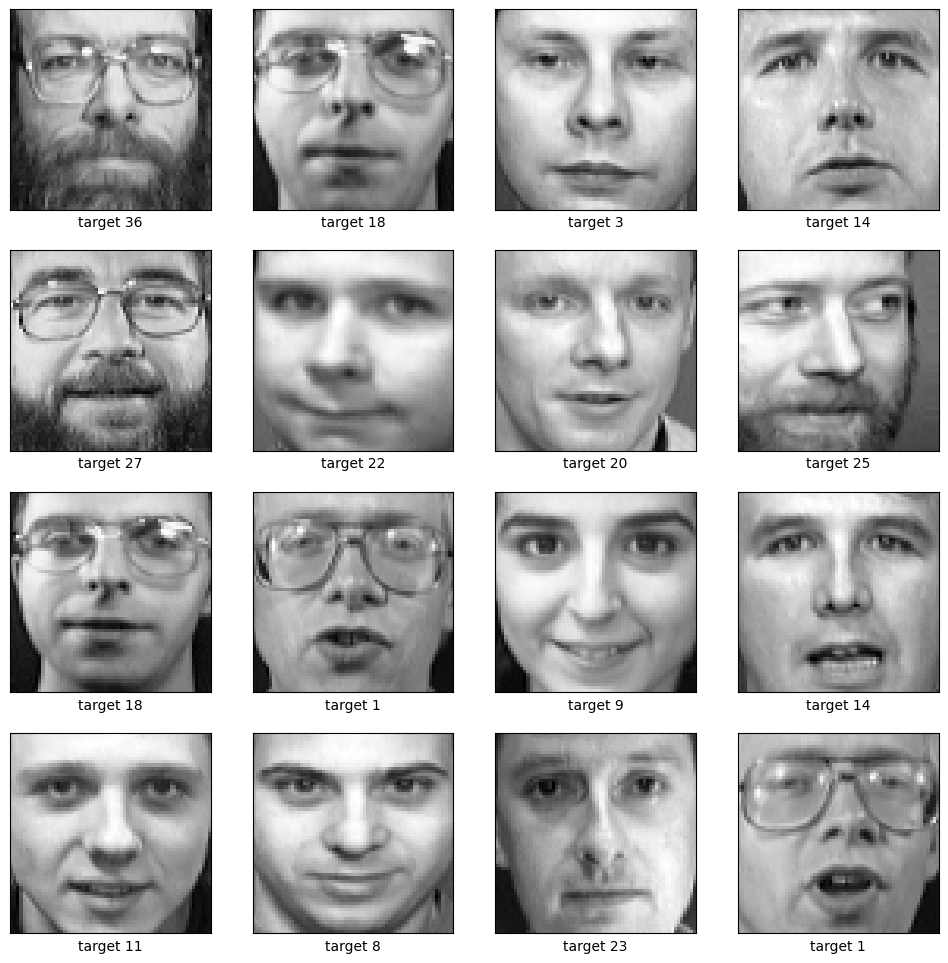

In [ ]:
faces_image = np.load("olivetti_faces.npy")
faces_target = np.load("olivetti_faces_target.npy")

fig, axes = plt.subplots(4, 4, figsize=(12, 12))
axes = axes.flatten()

for i, id in enumerate(np.random.choice(range(len(faces_target)), 16)):
    axes[i].imshow(faces_image[id], cmap="gray")
    axes[i].set_xticks([])
    axes[i].set_yticks([])
    axes[i].set_xlabel(f"target {faces_target[id]}")
fig.show()

In [ ]:
from sklearn.model_selection import train_test_split
faces_image_train, faces_image_test, faces_target_train, faces_target_test = \
    train_test_split(faces_image, faces_target, test_size=0.2, random_state=42, stratify=faces_target)

### 固有顔生成（$N^2 \times N^2$ 行列の固有値問題を解く）

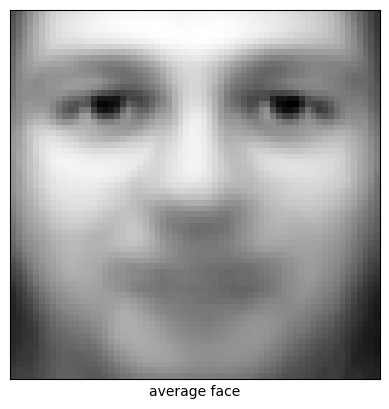

In [ ]:
# 平均顔
average_face = faces_image_train.mean(axis=0)
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.imshow(average_face, cmap="gray")
ax.set_xticks([])
ax.set_yticks([])
ax.set_xlabel("average face")
fig.show()

In [ ]:
# データ行列
diff_faces_train = faces_image_train - average_face
matrix_A_train = diff_faces_train.reshape(len(diff_faces_train), -1).T  # 4096*400

In [ ]:
# 固有顔計算（時間がかかる）
covar_matrix_train_1 = np.dot(matrix_A_train, matrix_A_train.T)  # 4096*4096
eigen_values_train_1, eigen_faces_train_1 = np.linalg.eig(covar_matrix_train_1)

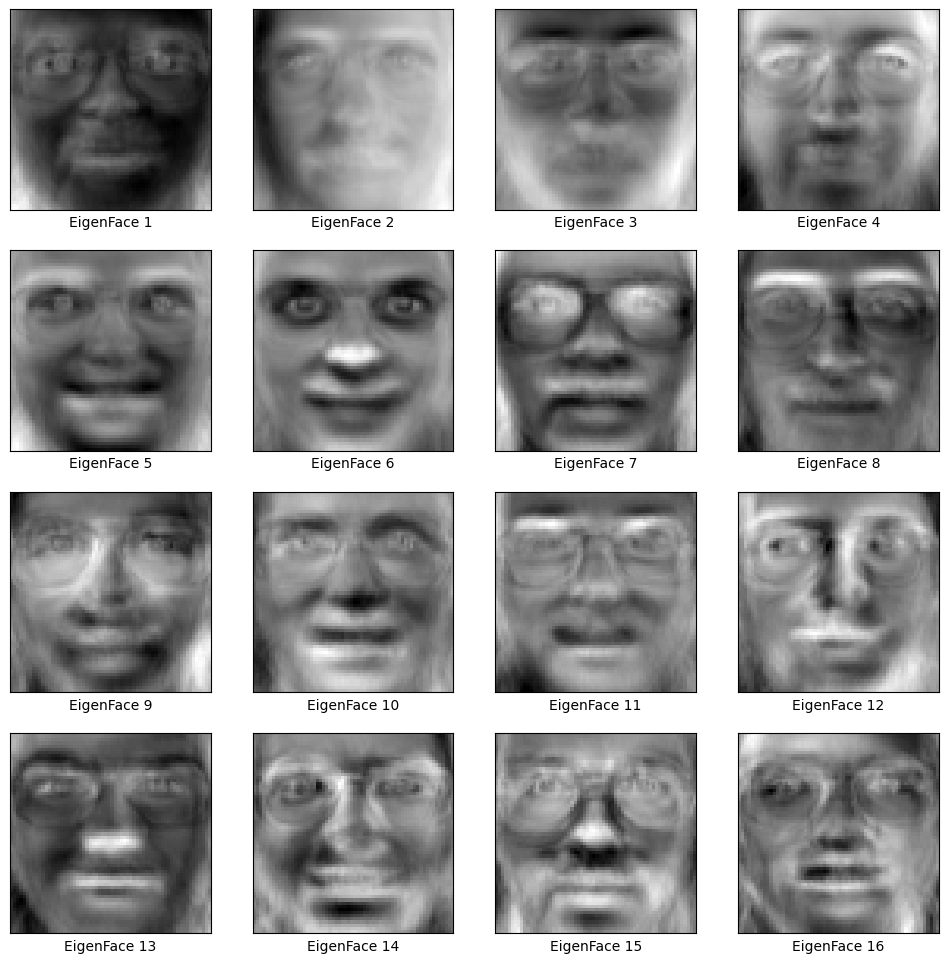

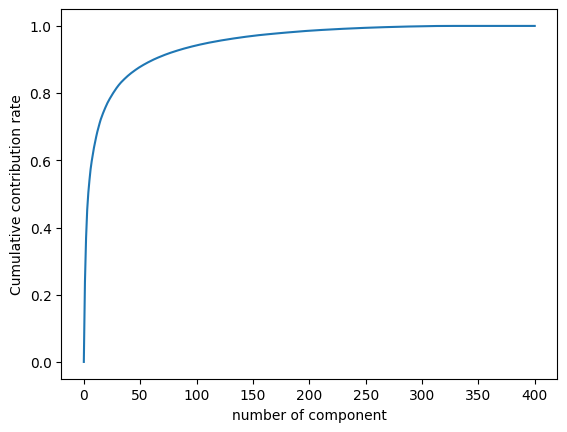

In [ ]:
# 固有顔を描画
fig, axes = plt.subplots(4, 4, figsize=(12, 12))
axes = axes.flatten()
for i in range(16):
    axes[i].imshow(eigen_faces_train_1[:, i].reshape(64, 64), cmap="gray")
    axes[i].set_xticks([])
    axes[i].set_yticks([])
    axes[i].set_xlabel(f"EigenFace {i+1}")
fig.show()

# 固有顔の累積寄与率
cum_explained_variance_ratio_1 = np.hstack([0, eigen_values_train_1[:400]]).cumsum() / eigen_values_train_1[:400].sum()
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(range(len(cum_explained_variance_ratio_1)), cum_explained_variance_ratio_1)
ax.set_xlabel("number of component")
ax.set_ylabel("Cumulative contribution rate")
fig.show()

### 固有顔生成（$M \times M$ 行列の固有値問題を解く）

In [ ]:
# 固有顔計算（早い）
covar_matrix_train_2 = np.dot(matrix_A_train.T, matrix_A_train)  # 400*400
eigen_values_train_2, eigen_vectors = np.linalg.eig(covar_matrix_train_2)
eigen_faces_train_2 = np.dot(matrix_A_train, eigen_vectors)  # 固有顔に変換

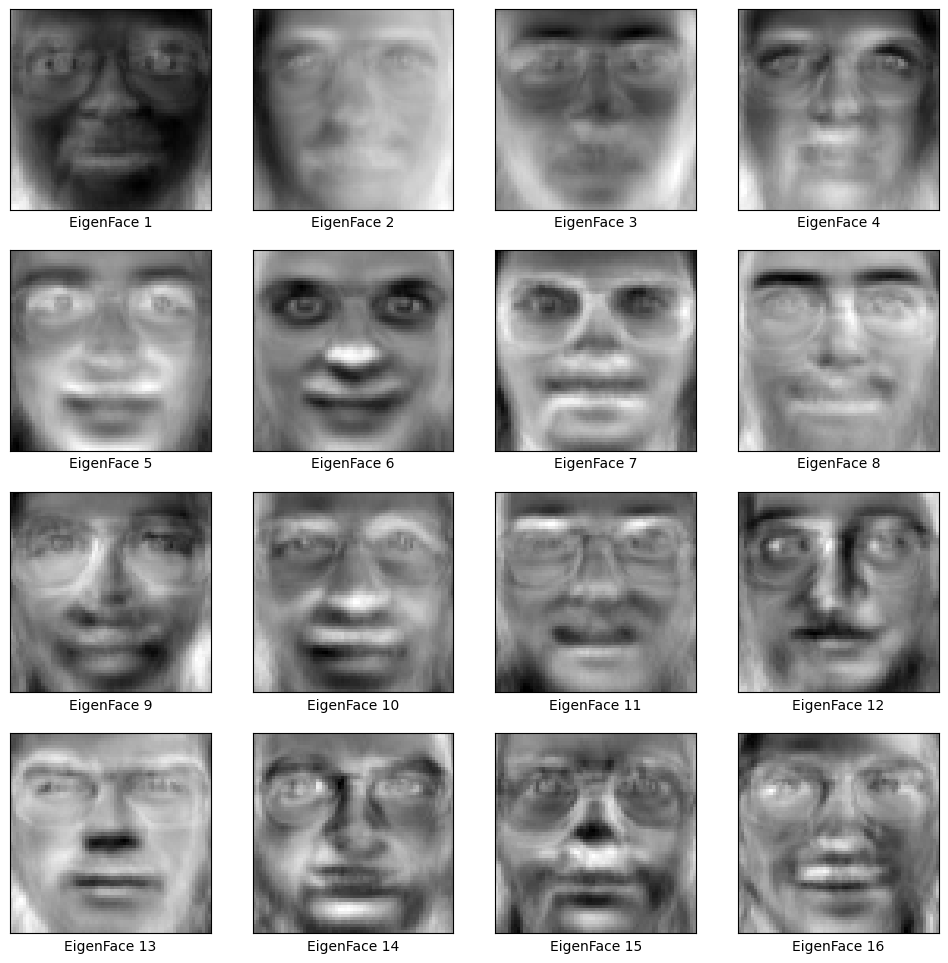

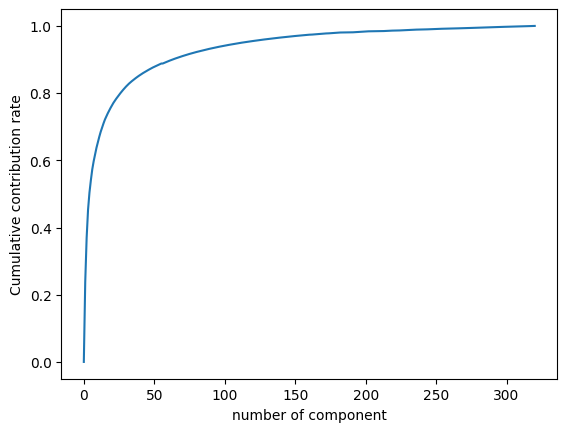

In [ ]:
# 固有顔を描画
fig, axes = plt.subplots(4, 4, figsize=(12, 12))
axes = axes.flatten()
for i in range(16):
    axes[i].imshow(eigen_faces_train_2[:, i].reshape(64, 64), cmap="gray")
    axes[i].set_xticks([])
    axes[i].set_yticks([])
    axes[i].set_xlabel(f"EigenFace {i+1}")
fig.show()

# 固有顔の累積寄与率
cum_explained_variance_ratio_2 = np.hstack([0, eigen_values_train_2]).cumsum() / eigen_values_train_2.sum()
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(range(len(cum_explained_variance_ratio_2)), cum_explained_variance_ratio_2)
ax.set_xlabel("number of component")
ax.set_ylabel("Cumulative contribution rate")
fig.show()

### ライブラリで実装

In [ ]:
from sklearn.decomposition import PCA
pca = PCA()
_ = pca.fit_transform(matrix_A_train.T)

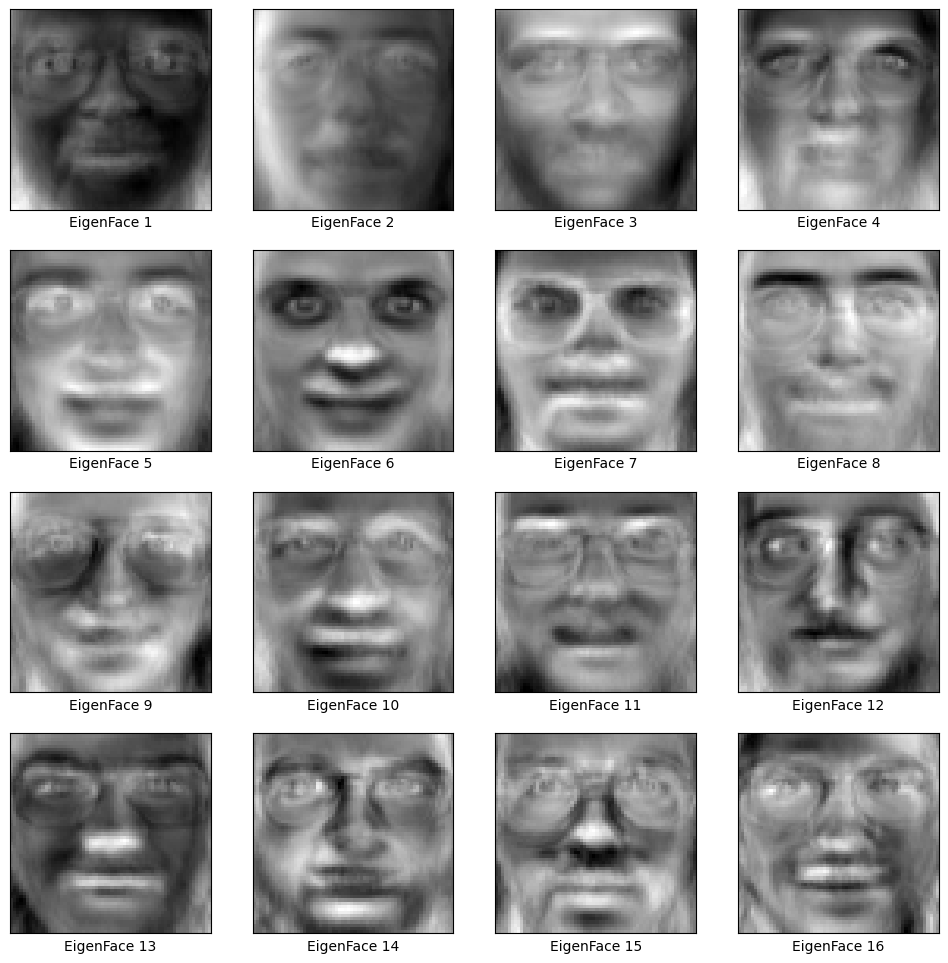

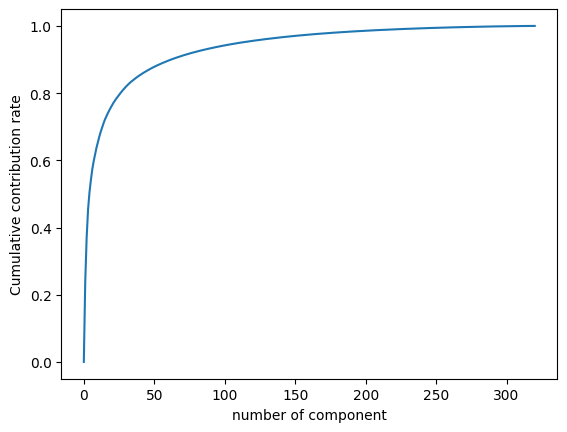

In [ ]:
# 固有顔を描画
fig, axes = plt.subplots(4, 4, figsize=(12, 12))
axes = axes.flatten()
for i in range(16):
    axes[i].imshow(pca.components_[i].reshape(64, 64), cmap="gray")
    axes[i].set_xticks([])
    axes[i].set_yticks([])
    axes[i].set_xlabel(f"EigenFace {i+1}")
fig.show()

# 固有顔の累積寄与率
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
cum_explained_variance_ratio_3 = np.hstack([0, pca.explained_variance_ratio_]).cumsum()
ax.plot(range(len(cum_explained_variance_ratio_3)), cum_explained_variance_ratio_3)
ax.set_xlabel("number of component")
ax.set_ylabel("Cumulative contribution rate")
fig.show()

## Using Eigenfaces
行列 $L$ の固有ベクトルから計算される固有顔は、顔画像を記述するための基底集合となる。SirovichとKirbyは白人男性の115枚の画像セットにこのフレームワークを限定的であるが適用し、$M' = 40$ の固有顔で顔画像の集合を非常に良く記述できることを明らかにした。

良く制御された条件下では、固有顔は顔画像を記述するのに十分であると考えられるため、本文献では顔認識のツールとしての有効性を評価した。識別には画像の正確な再構成は不要なため、より小さな $M'$ で十分である。このフレームワークにおいては、パターン認識タスクとなる。

固有顔は元の $N^2$ 次元画像空間の $M'$ 次元部分空間を張る。行列 $L$ の $M$ 個の固有ベクトルは、対応する固有値が大きいものから順に選ばれる。筆者らのテストケースの多くでは、$M = 16$ の顔画像に基づく、$M' = 7$ の固有顔が使用された。新しい顔画像 ($\Gamma$) は以下の操作によって固有顔成分に変換 (顔空間に射影) される。

$$
\omega_k = \textbf{u}_k^T (\Gamma - \Psi) \quad (k = 1, \dots, M')
$$

これらの重みを要素に持つベクトル $\Omega^T = \left[ \omega_1, \, \omega_2, \, \dots, \, \omega_M' \right]$ は、固有顔を顔画像の基底として扱い、入力画像を表現するための各固有顔の寄与度を表す。このベクトルは、標準的なパターン認識アルゴリズムで使用され、あらかじめ定義されたいくつかの顔クラス（もしあれば）のうち、どのクラスが顔を最もよく描写するかを見つけることができる。どの顔クラスが入力顔画像を最も良く説明するかを決定する最も単純な方法はユークリッド距離を用いる方法である。

$$
\epsilon_k = \|(\Omega - \Omega_k )\|^2
$$

ここで、$\Omega_k$ はk番目の顔クラスを表すベクトルである。顔クラス $\Omega_i$ は各個人の少数の顔画像にわたる固有顔表現結果の平均によって計算される。最小の $\epsilon_k$ が閾値 $\theta_{\epsilon}$ を下回ったとき、その顔画像はクラス $k$ に分類される。そうでないときは"unknown"に分類され、オプションとして新しい顔クラスの生成に使用される。

重みベクトル $\Omega$ を求めることは、元の顔画像を低次元の顔空間に射影することに等しいため、（顔に見えないものも含めた）多くの画像が与えられたパターンベクトル上に射影されることになる。しかし、画像と顔空間との距離 $\epsilon$ は、平均顔によって中心化された入力画像 $\Phi = \Gamma - \Psi$ とその顔空間への射影 $\Phi_f = \sum_{i=1}^{M'} \omega_i \textbf{u}_i$ との単純な距離の二乗であるため、このシステムでは問題にならない。

$$
\epsilon^2 = \| \Phi - \Phi_f \|^2
$$

上記の顔クラスとの距離 $\epsilon_k$ と顔空間との距離 $\epsilon^2$ の値によって、4つのケースが想定される。  
1. 顔空間に近く、ある顔クラスに近い  
近い顔クラスの画像に分類できる。  
2. 顔空間に近く、既知の顔クラスに近くない  
未知の人物である。  
3. 顔空間から遠く、ある顔クラスに近い  
顔画像ではないが、一般的なシステムでは擬陽性となりえる。筆者らのフレームワークでは画像と顔空間には十分な距離があったため、擬陽性は検知できると思われる。
4. 顔空間から遠く、既知の顔クラスに近くない  
顔画画像ではない。

In [ ]:
np.dot((faces_image_test - average_face).reshape(len(faces_target_test), -1), pca.components_.T).shape

(80, 320)